In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. OVERVIEW


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('01_dataset.csv')
df

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1.000205e+06,1.000000e+06,1.000000e+06,1.000000e+06,NaN,1.000000e+06,1.000000e+06,1.000000e+06,1.000205e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,1000000.0,431.0,431.0,431.0,431.0,1.0,7.0,7.0,17.0,17.0,2.0,7.0,7.0,2.0,2.0,7.0,2.0,2.0,2.0,7.0,7.0,2.0,2.0,7.0,2.0,NaN,2.0,17.0,12.0,7.0,2.0,12.0,2.0,7.0,2.0,17.0,12.0,7.0,2.0,12.0,2.0,7.0,7.000000,3.666667,7.000000,3.666667,3.666667,NaN,NaN,2.000000,2.000000,2.000000,7.000000,3.666667,7.000000,3.666667,3.666667,1000000.0
1,23717,0

# 2. Phân tích dữ liệu

In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 124 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    customer_id                           20000 non-null  int64  
 1    label                                 20000 non-null  int64  
 2    SHORT_TERM_COUNT                      18000 non-null  float64
 3    MID_TERM_COUNT                        18000 non-null  float64
 4    LONG_TERM_COUNT                       18000 non-null  float64
 5    SHORT_TERM_COUNT_BANK                 18000 non-null  float64
 6    MID_TERM_COUNT_BANK                   18000 non-null  float64
 7    LONG_TERM_COUNT_BANK                  18000 non-null  float64
 8    SHORT_TERM_COUNT_NON_BANK             18000 non-null  float64
 9    MID_TERM_COUNT_NON_BANK               18000 non-null  float64
 10   LONG_TERM_COUNT_NON_BANK              18000 non-null  float64
 11   

In [ ]:
df.describe()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,20000.000000,20000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800

In [ ]:
df.isnull().sum()

,0
customer_id,0
label,0
SHORT_TERM_COUNT,2000
MID_TERM_COUNT,2000
LONG_TERM_COUNT,2000
...,...
ENQUIRIES_FROM_NON_BANK_6M_9M,2000
ENQUIRIES_FROM_NON_BANK_9M_12M,2000
ENQUIRIES_FROM_NON_BANK_6M_12M,2000
ENQUIRIES_FROM_NON_BANK_3M_12M,2000


In [ ]:
df.drop(columns='customer_id', inplace=True)
df.drop(columns=['CREDIT_CARD_MONTH_SINCE_10DPD', 'CREDIT_CARD_MONTH_SINCE_30DPD', 'CREDIT_CARD_MONTH_SINCE_60DPD', 'CREDIT_CARD_MONTH_SINCE_90DPD'], inplace=True)
df = pd.concat([df['label'], df.drop(columns='label') - 1], axis=1)

- Xóa cột ID.
- Xóa các cột 'CREDIT_CARD_MONTH_SINCE' do giá trị hầu hết là 431, cho thấy lỗi tràn số, dẫn tới dữ liệu không có ý nghĩa.
- Giảm giá trị của toàn bộ dataset đi 1 do nhận thấy giá trị bị tăng lên 1 (có thể để phân biệt 0 và NaN).

In [ ]:
def find_duplicates(df, column_name):
    duplicates = df[df.duplicated(subset=[column_name], keep=False)]
    if not duplicates.empty:
        print(f"Duplicate rows found based on column '{column_name}':")
        print(duplicates)
    else:
        print(f"No duplicate rows found based on column '{column_name}'.")

# Example usage (assuming you want to check for duplicates in the 'label' column)
find_duplicates(df, 'label')

#To check duplicates across all columns:
def find_all_duplicates(df):
    duplicates = df[df.duplicated(keep=False)]
    if not duplicates.empty:
        print("Duplicate rows found:")
        print(duplicates)
    else:
        print("No duplicate rows found.")

find_all_duplicates(df)

Duplicate rows found based on column 'label':
       label  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
0          1               0.0             0.0              0.0   
1          0               9.0             0.0              NaN   
2          0               6.0             6.0              NaN   
3          0               6.0             0.0              0.0   
4          1               NaN             NaN              0.0   
...      ...               ...             ...              ...   
19995      0               3.0             0.0              0.0   
19996      0               3.0             0.0              0.0   
19997      0               6.0             0.0              0.0   
19998      0               9.0             3.0              0.0   
19999      1               0.0             3.0              0.0   

       SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
0                        0.0                  0.0                   0.0   

- Không có dữ liệu bị lặp


## 2.1 Fill một số feature có công thức liên hệ với các feature có tính chất tương đương

In [ ]:
def fill_Bank_Non_bank(x):
    global df
    df[x] = df[x].fillna(df[x + "_BANK"] + df[x + "_NON_BANK"])
    df[x + "_BANK"] = df[x + "_BANK"].fillna(df[x] - df[x + "_NON_BANK"])
    df[x + "_NON_BANK"] = df[x + "_NON_BANK"].fillna(df[x] - df[x + "_BANK"])
    return

Bank_Non_bank_List = ['LONG_TERM_COUNT', 'SHORT_TERM_COUNT', 'NUMBER_OF_LOANS', 'NUMBER_OF_CREDIT_CARDS', 'NUMBER_OF_RELATIONSHIP', 'MID_TERM_COUNT']

def Solve1():
    for name in Bank_Non_bank_List:
        fill_Bank_Non_bank(name)
    return

In [ ]:
def fill_Different_features(x, y, z):
    global df
    df[x] = df[x].fillna(df[y] + df[z])
    df[y] = df[y].fillna(df[x] - df[z])
    df[z] = df[z].fillna(df[x] - df[y])
    return

def Solve2():
    fill_Different_features('NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_LOANS', 'NUMBER_OF_CREDIT_CARDS')
    fill_Different_features('NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_CREDIT_CARDS_BANK')
    fill_Different_features('NUMBER_OF_RELATIONSHIP_NON_BANK', 'NUMBER_OF_LOANS_NON_BANK', 'NUMBER_OF_CREDIT_CARDS_NON_BANK')
    return

In [ ]:
def fill_Different_features_2(x, y, z, t):
    global df
    df[t] = df[t].fillna(df[x] + df[y] + df[z])
    df[x] = df[x].fillna(df[t] - (df[y] + df[z]))
    df[y] = df[y].fillna(df[t] - (df[x] + df[z]))
    df[z] = df[z].fillna(df[t] - (df[x] + df[y]))
    return


def Solve3():
    fill_Different_features_2('SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT', 'NUMBER_OF_LOANS')
    fill_Different_features_2('SHORT_TERM_COUNT_BANK', 'MID_TERM_COUNT_BANK', 'LONG_TERM_COUNT_BANK', 'NUMBER_OF_LOANS_BANK')
    fill_Different_features_2('SHORT_TERM_COUNT_NON_BANK', 'MID_TERM_COUNT_NON_BANK', 'LONG_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS_NON_BANK')
    return

In [ ]:
Solve1()
Solve2()
Solve1()
Solve3()
Solve1()
Solve2()
Solve1()
Solve3()
Solve1()

In [ ]:
df.isnull().sum()

,0
label,0
SHORT_TERM_COUNT,8
MID_TERM_COUNT,7
LONG_TERM_COUNT,7
SHORT_TERM_COUNT_BANK,8
...,...
ENQUIRIES_FROM_NON_BANK_6M_9M,2000
ENQUIRIES_FROM_NON_BANK_9M_12M,2000
ENQUIRIES_FROM_NON_BANK_6M_12M,2000
ENQUIRIES_FROM_NON_BANK_3M_12M,2000


## 2.2 Phát hiện bất thường

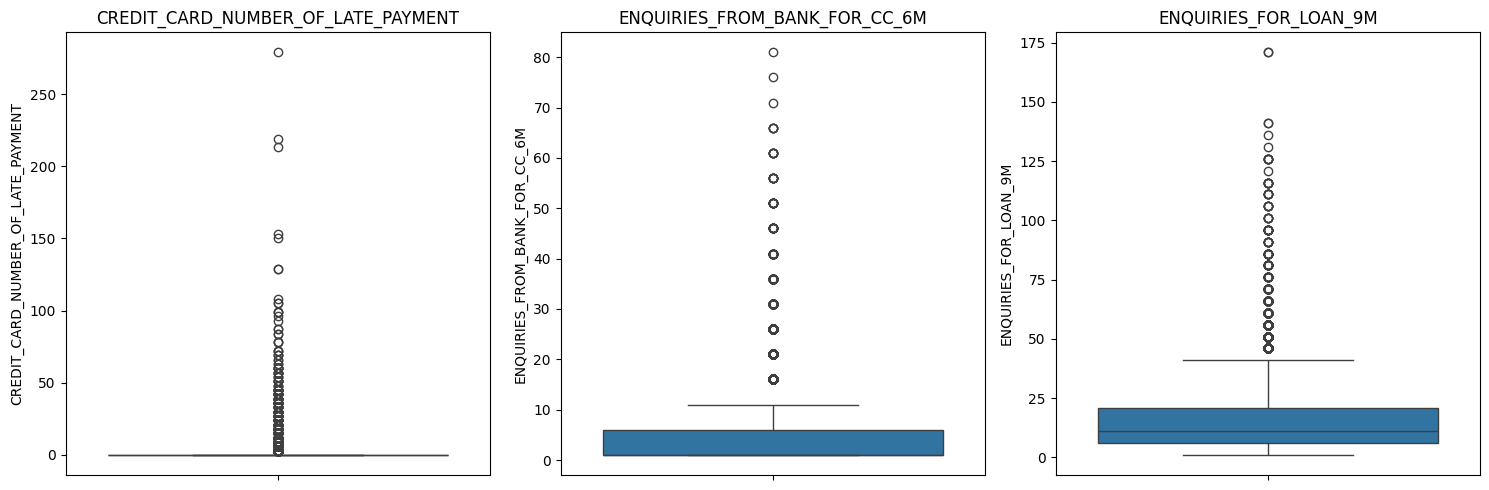

In [ ]:
# prompt: box plot CREDIT_CARD_NUMBER_OF_LATE_PAYMENT, ENQUIRIES_FROM_BANK_12M	ENQUIRIES_FOR_LOAN_9M in df, present by 1*3 table

import matplotlib.pyplot as plt
import seaborn as sns

# Create a 1x3 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for each feature
sns.boxplot(y=df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'], ax=axes[0])
axes[0].set_title('CREDIT_CARD_NUMBER_OF_LATE_PAYMENT')

sns.boxplot(y=df['ENQUIRIES_FROM_BANK_FOR_CC_6M'], ax=axes[1])
axes[1].set_title('ENQUIRIES_FROM_BANK_FOR_CC_6M')

sns.boxplot(y=df['ENQUIRIES_FOR_LOAN_9M'], ax=axes[2])
axes[2].set_title('ENQUIRIES_FOR_LOAN_9M')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

##2.3 Phát triển đặc trưng


In [ ]:
# Find columns with correlation greater than 0.8
corr_matrix = df.drop('label', axis=1).corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.8)]

# Display the columns to be dropped
print(to_drop)

# Drop the columns
df_filter = df.drop(columns=to_drop)
df_filter.drop('label', axis=1, inplace=True)
print(df_filter.shape)

['LONG_TERM_COUNT_BANK', 'MID_TERM_COUNT_NON_BANK', 'NUMBER_OF_LOANS_BANK', 'NUMBER_OF_CREDIT_CARDS_BANK', 'NUMBER_OF_RELATIONSHIP', 'NUMBER_OF_RELATIONSHIP_BANK', 'NUMBER_OF_RELATIONSHIP_NON_BANK', 'NUM_NEW_LOAN_TAKEN_9M', 'NUM_NEW_LOAN_TAKEN_12M', 'NUM_NEW_LOAN_TAKEN_BANK_3M', 'NUM_NEW_LOAN_TAKEN_BANK_6M', 'NUM_NEW_LOAN_TAKEN_BANK_9M', 'NUM_NEW_LOAN_TAKEN_BANK_12M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_3M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_6M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_9M', 'NUM_NEW_LOAN_TAKEN_NON_BANK_12M', 'OUTSTANDING_BAL_LOAN_3M', 'OUTSTANDING_BAL_LOAN_6M', 'OUTSTANDING_BAL_LOAN_9M', 'OUTSTANDING_BAL_LOAN_12M', 'OUTSTANDING_BAL_CC_6M', 'OUTSTANDING_BAL_CC_9M', 'OUTSTANDING_BAL_CC_12M', 'OUTSTANDING_BAL_ALL_3M', 'OUTSTANDING_BAL_ALL_6M', 'OUTSTANDING_BAL_ALL_9M', 'OUTSTANDING_BAL_ALL_12M', 'OUTSTANDING_BAL_LOAN_9M_12M', 'OUTSTANDING_BAL_LOAN_6M_12M', 'OUTSTANDING_BAL_LOAN_3M_12M', 'OUTSTANDING_BAL_CC_6M_9M', 'OUTSTANDING_BAL_CC_9M_12M', 'OUTSTANDING_BAL_CC_6M_12M', 'OUTSTANDING_BAL_CC_3M_

In [ ]:
def calculate_column(df, i, j):
    mean_col1 = df[i].mean()
    mean_col2 = df[j].mean()

    if (mean_col1 > 1000 and mean_col2 > 1000) or (mean_col1 < 1000 and mean_col2 < 1000):
        return df[i] + df[j]  # col1 + col2 if both means are greater than or less than 1000
    else:
        return df[i] * df[j]  # col1 * col2 otherwise

# Create a new DataFrame to store the interaction features
df_interaction = pd.DataFrame()
interaction_features = []

# Iterate through each pair of columns in df_filter
for i in range(len(df_filter.columns)):
    for j in range(i + 1, len(df_filter.columns)):
        col1 = df_filter.columns[i]
        col2 = df_filter.columns[j]
        # Create a new column representing the interaction between the two features
        new_col_name = f'{col1}_x_{col2}'
        interaction_features.append(pd.Series(calculate_column(df, col1, col2), name=new_col_name))

df_interaction = pd.concat(interaction_features, axis=1)

# Concatenate the interaction features with the original DataFrame
df_filter = pd.concat([df, df_interaction], axis=1)

In [ ]:
df_filter

label  SHORT_TERM_COUNT  MID_TERM_COUNT  LONG_TERM_COUNT  \
0          1               0.0             0.0              0.0   
1          0               9.0             0.0              0.0   
2          0               6.0             6.0              0.0   
3          0               6.0             0.0              0.0   
4          1               0.0             3.0              0.0   
...      ...               ...             ...              ...   
19995      0               3.0             0.0              0.0   
19996      0               3.0             0.0              0.0   
19997      0               6.0             0.0              0.0   
19998      0               9.0             3.0              0.0   
19999      1               0.0             3.0              0.0   

       SHORT_TERM_COUNT_BANK  MID_TERM_COUNT_BANK  LONG_TERM_COUNT_BANK  \
0                        0.0                  0.0                   0.0   
1                        6.0                  0.0                   0.0   
2                        6.0                  3.0                   0.0   
3                        0.0                  0.0                   0.0   
4                        0.0                  0.0                   0.0   
...                      ...                  ...                   ...   
19995                    3.0                  0.0                   0.0   
19996                    0.0                  0.0                   0.0   
19997                    3.0                  0.0                   0.0   
19998                    9.0                  0.0                   0.0   
19999                    0.0                  0.0                   0.0   

       SHORT_TERM_COUNT_NON_BANK  MID_TERM_COUNT_NON_BANK  \
0                            0.0                      0.0   
1                            3.0                      0.0   
2                            0.0                      3.0   
3                            6.0                      0.0   
4                            0.0                      3.0   
...                          ...                      ...   
19995                        0.0                      0.0   
19996                        3.0                      0.0   
19997                        3.0                      0.0   
19998                        0.0                      3.0   
19999                        0.0                      3.0   

       LONG_TERM_COUNT_NON_BANK  NUMBER_OF_LOANS  NUMBER_OF_LOANS_BANK  \
0                           0.0              0.0                   0.0   
1                           0.0              9.0                   6.0   
2                           0.0             12.0                   9.0   
3                           0.0              6.0                   0.0   
4                           0.0              3.0                   0.0   
...                         ...              ...                   ...   
19995                       0.0              3.0                   3.0   
19996                       0.0              3.0                   0.0   
19997                       0.0              6.0                   3.0   
19998                       0.0             12.0                   9.0   
19999                       0.0              3.0                   0.0   

       NUMBER_OF_LOANS_NON_BANK  NUMBER_OF_CREDIT_CARDS  \
0                           0.0                     0.0   
1                           3.0                     9.0   
2                           3.0                     6.0   
3                           6.0                     6.0   
4                           3.0                     3.0   
...                         ...                     ...   
19995                       0.0                     0.0   
19996                       3.0                     0.0   
19997                       3.0                    12.0   
19998                       3.0                    12.0   
19999                       3.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X = df_filter.drop('label', axis=1)
y = df_filter['label']

# Fill the data
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce to 30 features
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['label'] = y.values

In [ ]:
pca.components_

array([[ 0.06054149,  0.04049248,  0.00760069, ...,  0.01354388,
         0.00237838,  0.00423196],
       [ 0.04592867, -0.04262787, -0.01439039, ...,  0.05959341,
         0.06391813,  0.06564761],
       [-0.03858553, -0.01671809,  0.00313036, ...,  0.06479271,
         0.06435112,  0.06510141],
       ...,
       [-0.00111163, -0.00462206, -0.01156363, ...,  0.09857124,
        -0.04536699, -0.04150366],
       [ 0.00073837,  0.00425557,  0.00131918, ..., -0.07178889,
         0.00996659,  0.0194077 ],
       [ 0.00326029,  0.00068408, -0.00151349, ...,  0.02701329,
        -0.01914967, -0.01942945]])

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df_pca is your DataFrame with PCA components and the 'label' column
# # Replace 'df_pca' with the actual name of your DataFrame if different

# # Calculate the correlation matrix
# correlation_matrix = df_pca.corr()

# # Plot the heatmap
# plt.figure(figsize=(120, 100))  # Adjust figure size as needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidth=0.5,square=True)
# plt.title('Correlation Matrix of PCA Components')
# plt.show()

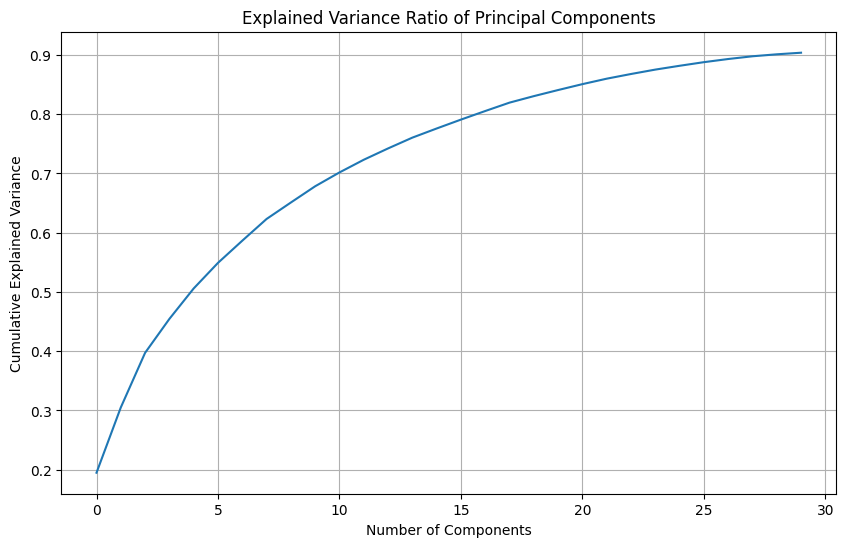

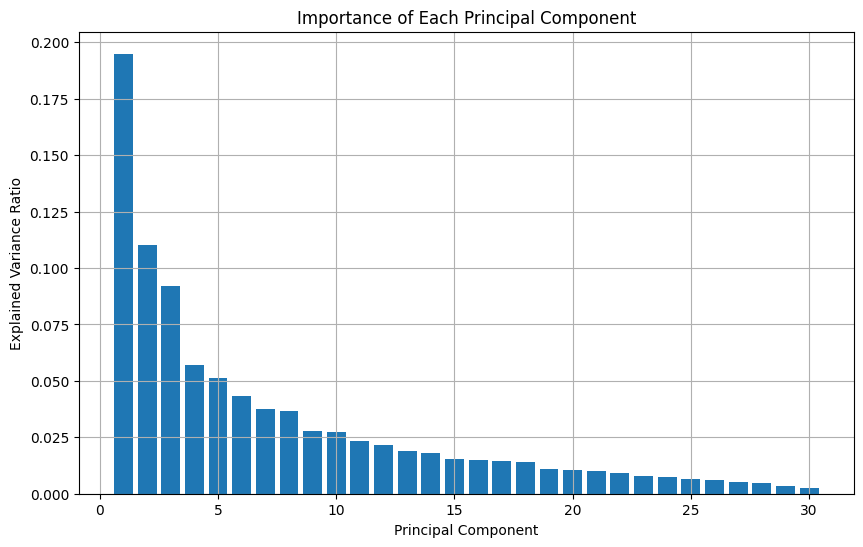

In [ ]:
# Plot the explained variance ratio for each principal component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

# Alternatively, plot the importance of each PC (explained variance ratio)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Importance of Each Principal Component')
plt.grid(True)
plt.show()

In [ ]:
# Number of PCs to consider
num_pcs = 30

# Number of top features to select for each PC
num_top_features = 5

# Create an empty list to store the results
important_features = []


for i in range(min(num_pcs, len(df_pca.columns) -1 )):  # Iterate through PCs
    pc_name = f'PC{i + 1}'
    # Get the absolute weights of the features for the current PC
    weights = abs(pca.components_[i])

    # Get the indices of the top features
    top_feature_indices = np.argsort(weights)[::-1][:num_top_features]

    #Get original feature names from the initial dataset's columns
    original_feature_names = df_filter.drop('label', axis=1).columns

    # Get feature names for the current PC
    top_features = [(original_feature_names[j], weights[j]) for j in top_feature_indices]

    important_features.append((pc_name, top_features))

# Print the important features for each PC
for pc, features in important_features:
    print(f"Top {num_top_features} features for {pc}:")
    for feature_name, weight in features:
        print(f"  - {feature_name}: {weight:.4f}")
    print(20 * '-')

Top 5 features for PC1:
  - NUMBER_OF_LOANS: 0.0748
  - LONG_TERM_COUNT_NON_BANK_x_NUMBER_OF_LOANS: 0.0748
  - SHORT_TERM_COUNT_x_MID_TERM_COUNT: 0.0746
  - LONG_TERM_COUNT_x_NUMBER_OF_LOANS: 0.0744
  - SHORT_TERM_COUNT_x_NUMBER_OF_LOANS: 0.0738
--------------------
Top 5 features for PC2:
  - SHORT_TERM_COUNT_NON_BANK_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0703
  - ENQUIRIES_3M_12M: 0.0699
  - ENQUIRIES_9M_12M_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0677
  - ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0675
  - LONG_TERM_COUNT_NON_BANK_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0673
--------------------
Top 5 features for PC3:
  - ENQUIRIES_FROM_NON_BANK_FOR_CC_3M_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0834
  - ENQUIRIES_FROM_NON_BANK_3M_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0825
  - ENQUIRIES_FROM_NON_BANK_FOR_CC_6M_x_ENQUIRIES_FROM_NON_BANK_3M_12M: 0.0801
  - ENQUIRIES_FROM_NON_BANK_FOR_CC_3M_x_ENQUIRIES_FROM_NON_BANK_6M_9M: 0.0787
  - ENQUIRIES_FROM_NON_BANK_3M_x_ENQUIRIES_3M_6M: 0.0776
--------------------
Top

#3. EDA

## 3.1 Trực quan hóa phân bố của label

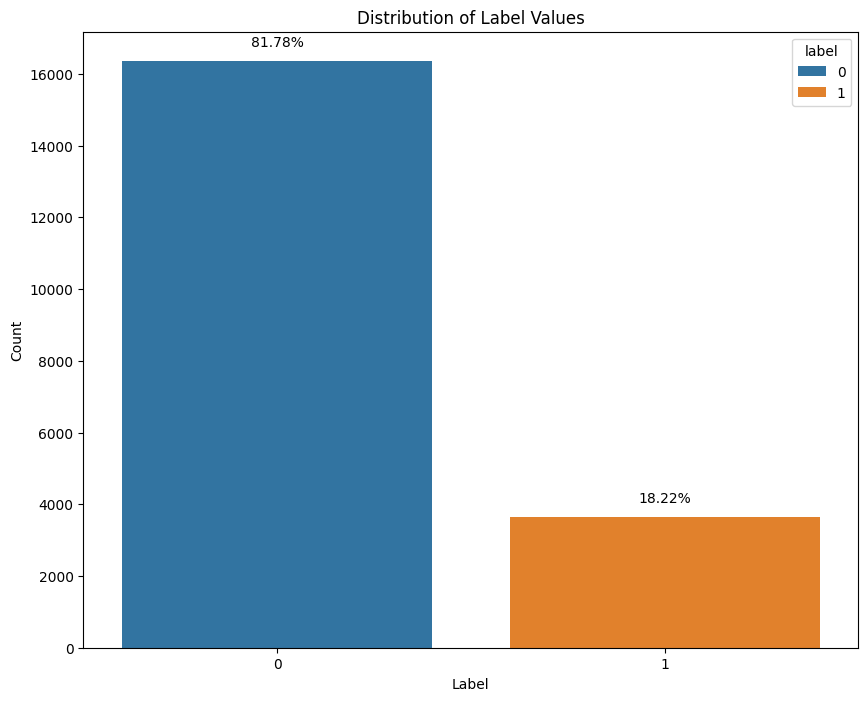

In [ ]:
# Count the occurrences of each unique value in the 'label' column
label_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index)
rate = label_counts.values / label_counts.sum()
for i, v in enumerate(label_counts.values):
    plt.text(i, v + 0.02 * max(label_counts.values), f'{rate[i]:.2%}', ha='center', va='bottom')
plt.title('Distribution of Label Values')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

- Dữ liệu thiếu khá nhiều label 1 so với label 0, do đó cần sử dụng kĩ thuật resampling để cân bằng bộ dữ liệu.

## 3.2 Trực quan hóa phân bố của các đặc trưng mang nhiều ý nghĩa đối với label

###3.2.1 Khoản vay ngắn, trung và dài hạn

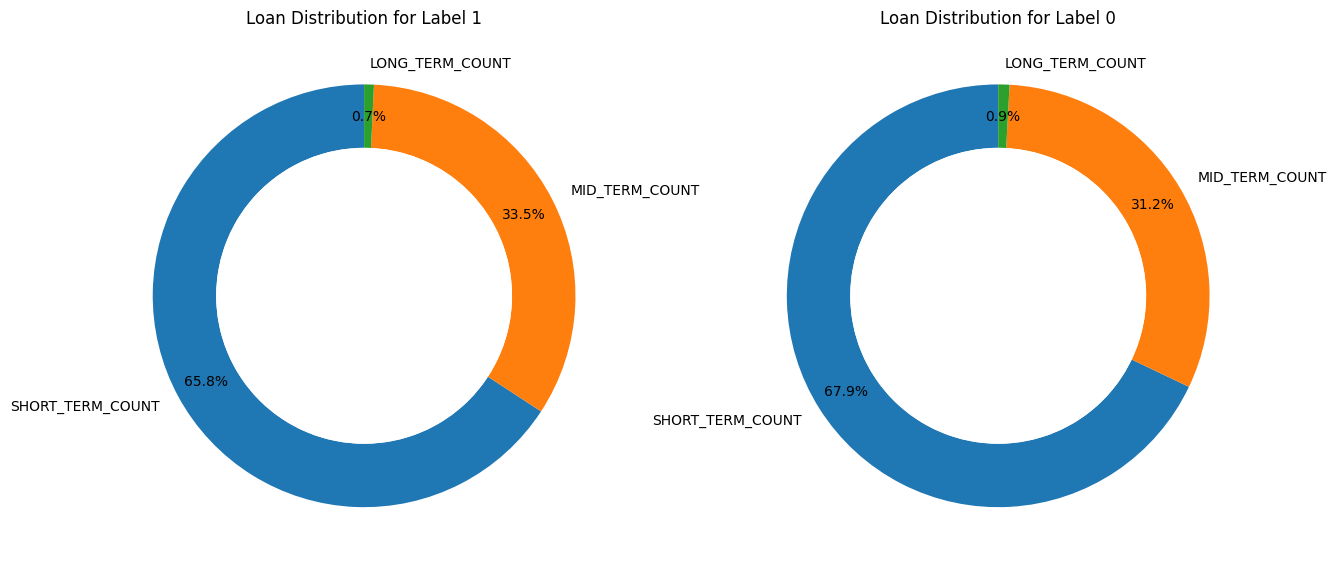

In [ ]:
import matplotlib.pyplot as plt

def plot_donut_charts(df):
    labels = df['label'].unique()
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    for i, label in enumerate(labels):
        df_label = df[df['label'] == label]

        # Data for the donut chart
        categories = ['SHORT_TERM_COUNT', 'MID_TERM_COUNT', 'LONG_TERM_COUNT']
        counts = [df_label[col].sum() for col in categories]

        # Plot the donut chart
        axes[i].pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))

        # Add a circle in the center to create a donut shape
        center_circle = plt.Circle((0, 0), 0.70, fc='white')
        axes[i].add_artist(center_circle)

        axes[i].set_title(f'Loan Distribution for Label {label}')

    plt.show()

plot_donut_charts(df)

- SHORT_TERM_COUNT chiếm đa số cho thấy khách hàng ưa chuộng vay ngắn hạn
- Tuy nhiên, tỉ lệ về vay ngắn, trung và dài hạn trên cả label 0 và 1 khá tương tự nhau. Vì vậy, không thể căn cứ vào số khoản nợ để đánh giá một khách hàng có khả năng trả nợ đúng hạn hay không

###3.2.2 Số lượt tra cứu tín dụng liên quan đến các sẳn phẩm tài chính

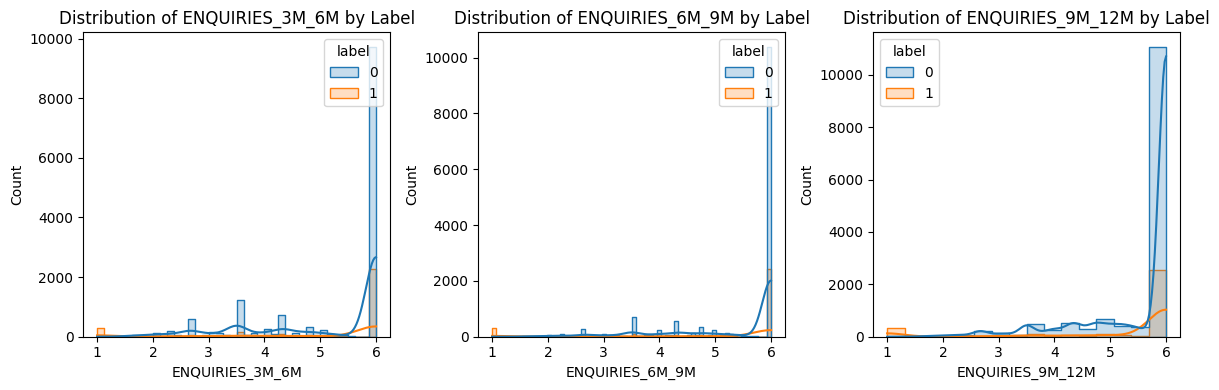

In [ ]:
# prompt: plot to compare ENQUIRIES_3M_12M, ENQUIRIES_6M_12M, ENQUIRIES_9M_12M in df, hue = label, display like table 2*2

import matplotlib.pyplot as plt
import seaborn as sns

features = ['ENQUIRIES_3M_6M', 'ENQUIRIES_6M_9M', 'ENQUIRIES_9M_12M']

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='label', ax=axes[i], kde=True, element='step')
    axes[i].set_title(f'Distribution of {feature} by Label')

plt.tight_layout()
plt.show()

- Dễ thấy rằng số lượt tra cứu tín dụng liên quan đến sản phẩm tài chính càng ít thì khả năng khách hàng trả nợ không đúng hạn càng cao và ngược lại.
- Tuy nhiên, thời điểm thực hiện tra cứu tín dụng không ảnh hưởng tới khả năng trả nợ của khách hàng.

### 3.2.3 Tổng số thẻ tín dụng

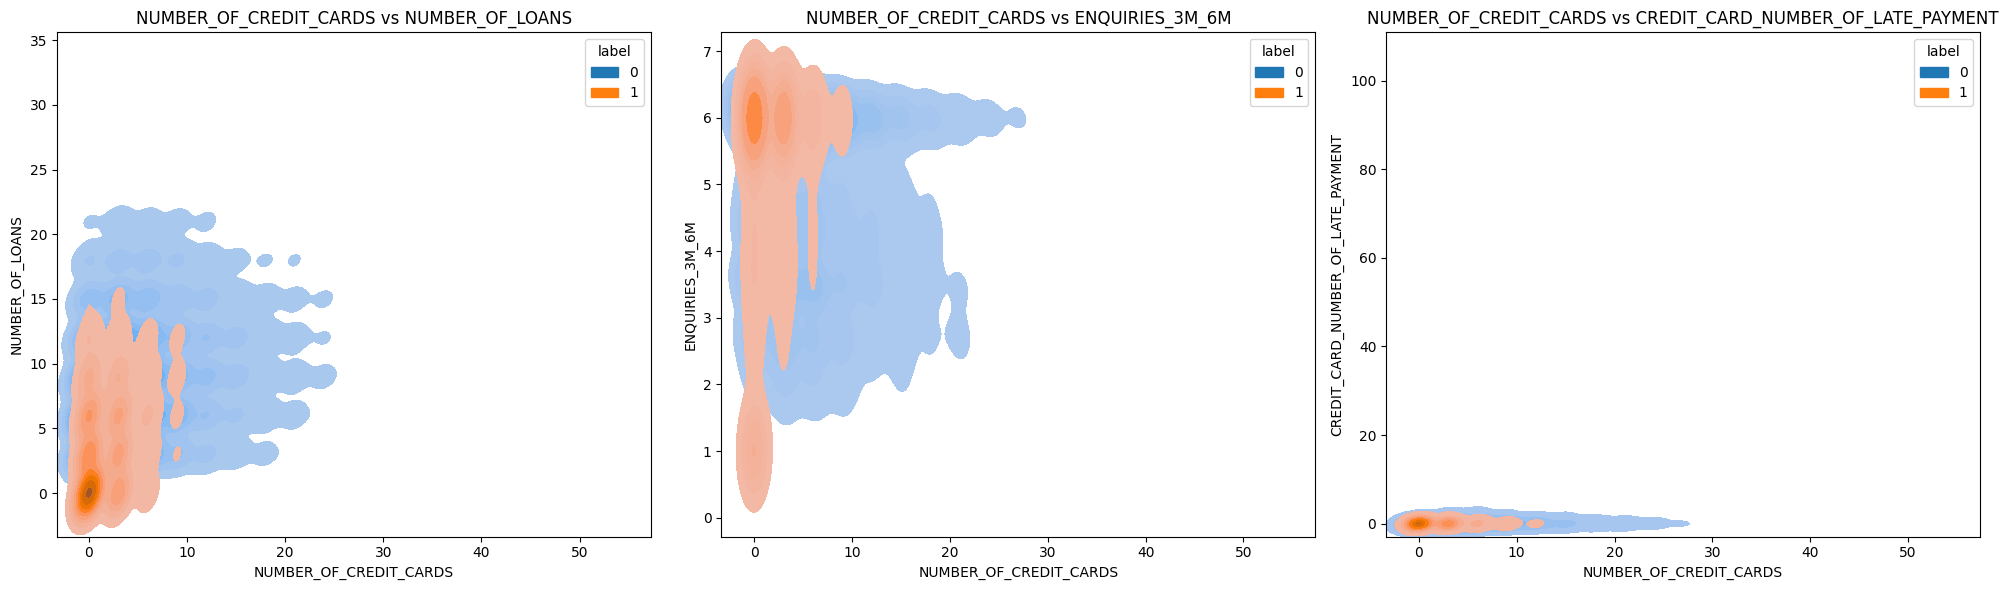

In [ ]:
# prompt:  2D Density Plot, x='NUMBER_OF_CREDIT_CARDS', y='NUMBER_OF_LOANS', data=df, hue='label'; data=df, x='NUMBER_OF_CREDIT_CARDS', y='ENQUIRIES_FROM_NON_BANK_3M_6M', hue='label'; data=df, x='NUMBER_OF_CREDIT_CARDS', y='CREDIT_CARD_NUMBER_OF_LATE_PAYMENT', hue='label'; present by a 1*3 table

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1
sns.kdeplot(data=df, x='NUMBER_OF_CREDIT_CARDS', y='NUMBER_OF_LOANS', hue='label', ax=axes[0], fill=True)
axes[0].set_title('NUMBER_OF_CREDIT_CARDS vs NUMBER_OF_LOANS')

# Plot 2
sns.kdeplot(data=df, x='NUMBER_OF_CREDIT_CARDS', y='ENQUIRIES_3M_6M', hue='label', ax=axes[1], fill=True)
axes[1].set_title('NUMBER_OF_CREDIT_CARDS vs ENQUIRIES_3M_6M')

# Plot 3
temp = df[df['CREDIT_CARD_NUMBER_OF_LATE_PAYMENT'] <= 125]
sns.kdeplot(data=temp, x='NUMBER_OF_CREDIT_CARDS', y='CREDIT_CARD_NUMBER_OF_LATE_PAYMENT', hue='label', ax=axes[2], fill=True)
axes[2].set_title('NUMBER_OF_CREDIT_CARDS vs CREDIT_CARD_NUMBER_OF_LATE_PAYMENT')

plt.tight_layout()
plt.show()

- Nhận thấy rằng những khách hàng không có khả năng trả nợ đúng hạn thường có ít thẻ tín dụng và khoản vay (gọi chung là mối quan hệ tài chính) từ ngân hàng hay tổ chức phi ngân hàng.
- Đặc biệt, khách hàng vừa có ít thẻ tín dụng, vừa có ít lượt tra cứu (1-2 lượt) hoặc không tra cứu tín dụng liên quan đến các sản phẩm tài chính trong 3-6 tháng gần đây có khả năng rất cao sẽ trả nợ không đúng hạn.
- Ngoài ra, cũng khá bất ngờ khi những khách hàng không có khả năng trả nợ đúng hạn có ít lần thanh toán trễ trên các thẻ tín dụng. Điều này có thể khách hàng thuộc nhóm này có số lượng thẻ tín dụng khá ít.

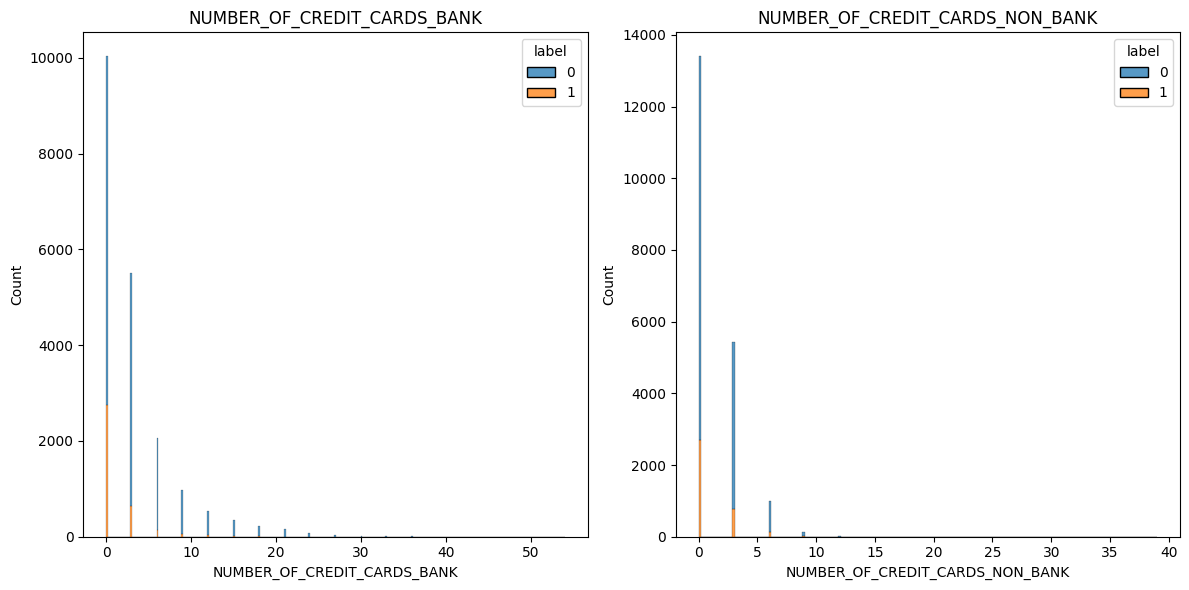

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='NUMBER_OF_CREDIT_CARDS_BANK', hue='label', multiple="stack")
plt.title('NUMBER_OF_CREDIT_CARDS_BANK')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='NUMBER_OF_CREDIT_CARDS_NON_BANK', hue='label', multiple="stack")
plt.title('NUMBER_OF_CREDIT_CARDS_NON_BANK')

plt.tight_layout()
plt.show()

- Như đã thấy, khách hàng không có khả năng trả nợ đúng hạn sẽ có xu hướng sử dụng ít thẻ tín dụng. Tuy nhiên, việc thẻ tín dụng được cấp bởi ngân hàng hay tổ chức phi ngân hàng không ảnh hưởng tới việc xác định khả năng trả nợ của khách hàng.

###3.2.4 Chênh lệch số dư nợ theo thời gian

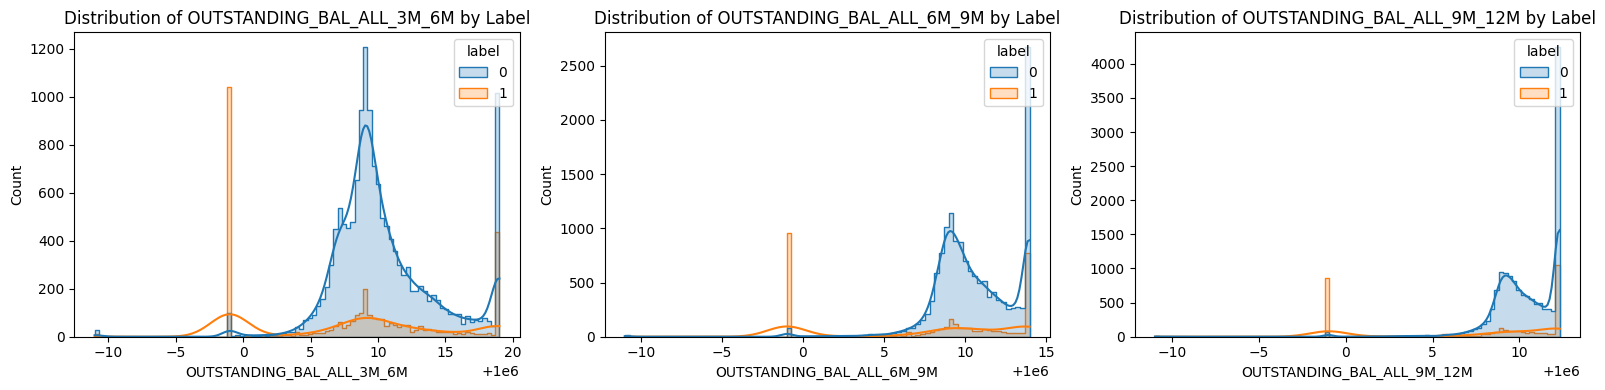

In [ ]:
# prompt: plot to compare ENQUIRIES_12M, ENQUIRIES_3M_12M, ENQUIRIES_6M_12M, ENQUIRIES_9M_12M in df, hue = label, display like table 2*2

import matplotlib.pyplot as plt
import seaborn as sns

features = ['OUTSTANDING_BAL_ALL_3M_6M', 'OUTSTANDING_BAL_ALL_6M_9M', 'OUTSTANDING_BAL_ALL_9M_12M']

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='label', ax=axes[i], kde=True, element='step')
    axes[i].set_title(f'Distribution of {feature} by Label')

plt.tight_layout()
plt.show()

- Dễ thấy, phân bố label 1 chủ yếu nằm bên trái giá trị 0. Điều này cho thấy khách hàng thường không có khả năng trả nợ đúng hạn khi bị tăng số dư nợ theo thời gian.

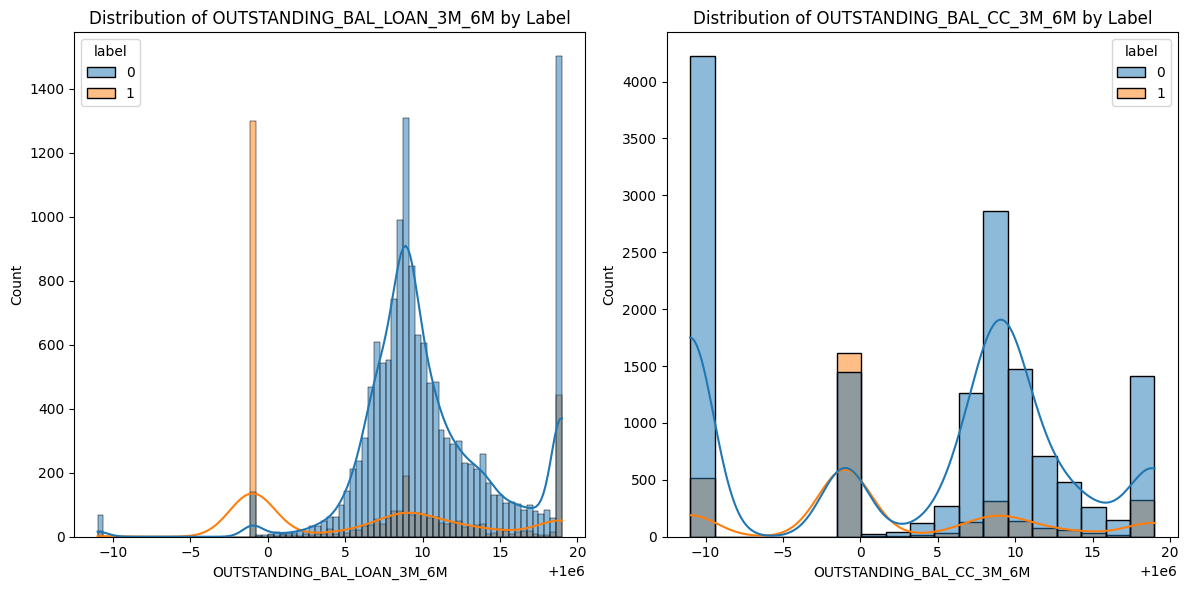

In [ ]:
# prompt: 2 histplot of OUTSTANDING_BAL_LOAN_3M_6M vs. OUTSTANDING_BAL_CC_3M_6M, hue = label, table 1*2

# Assuming 'df' is your DataFrame from the previous code

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='OUTSTANDING_BAL_LOAN_3M_6M', hue='label', kde=True)
plt.title('Distribution of OUTSTANDING_BAL_LOAN_3M_6M by Label')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='OUTSTANDING_BAL_CC_3M_6M', hue='label', kde=True)
plt.title('Distribution of OUTSTANDING_BAL_CC_3M_6M by Label')

plt.tight_layout()
plt.show()

- Ta thấy lí do chính khiến tăng số dư nợ của nhóm khách hàng không có khả năng trả nợ đúng hạn chủ yếu là do các khoản vay

#4. Phát triển mô hình

## 4.1 Tiền xử lí

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(20, 16))
# sns.heatmap(df_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap of Principal Components')
# plt.show()

In [ ]:
X_pca = df_pca.drop(['label'], axis=1)
y = df_pca['label']

##4.2 Xây dựng mô hình

In [ ]:
# X = df_pca
# y = df['label']

In [ ]:
# print(X.isnull().sum())

In [ ]:
# print(X.shape)
# print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify = y, random_state=42)

RESAMPLING (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy = 1, k_neighbors= 5, random_state=42)
X_train_pca, y_train = smote.fit_resample(X_train_pca, y_train)

print(X_train_pca.shape)
print(y_train.shape)

(26170, 30)
(26170,)


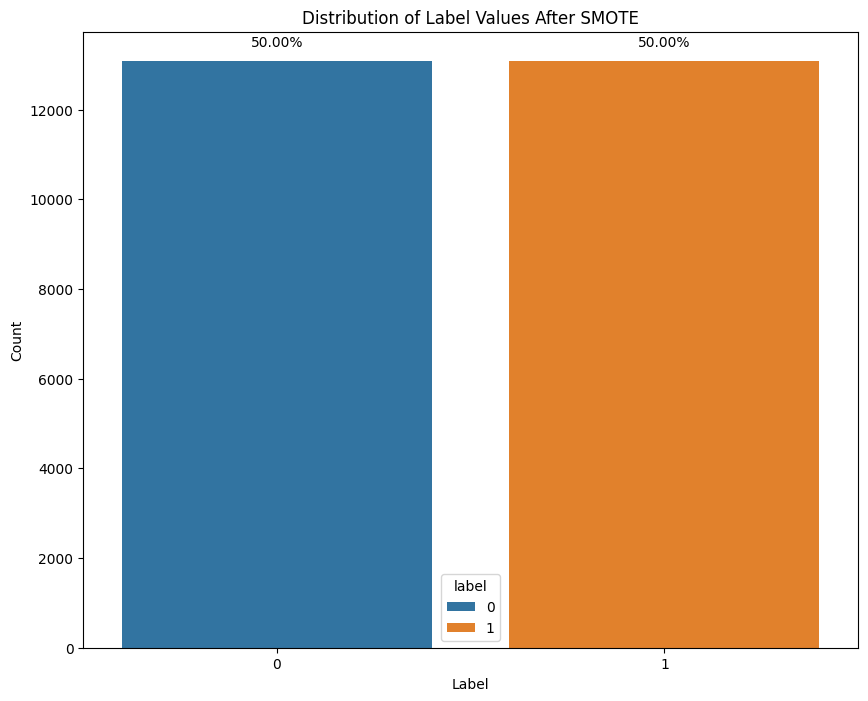

In [ ]:
# Count the occurrences of each unique value in the 'y_train' after SMOTE
label_counts_smote = y_train.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts_smote.index, y=label_counts_smote.values, hue=label_counts_smote.index)
rate_smote = label_counts_smote.values / label_counts_smote.sum()
for i, v in enumerate(label_counts_smote.values):
    plt.text(i, v + 0.02 * max(label_counts_smote.values), f'{rate_smote[i]:.2%}', ha='center', va='bottom')
plt.title('Distribution of Label Values After SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
# from imblearn.under_sampling import TomekLinks

# # Create a TomekLinks object
# tomek = TomekLinks()

# # Apply TomekLinks to the training data
# X_train, y_train = tomek.fit_resample(X_train, y_train)

# # Now X_train_tomek and y_train_tomek are your training data after TomekLinks
# print(X_train.shape)
# print(y_train.shape)

NORMALIZATION (STANDARD SCALER)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Assuming X_train_smote is your training data DataFrame
# scaler = StandardScaler()

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the testing data using the same scaler fitted on the training data
# X_test_scaled = scaler.transform(X_test)

###4.2.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=3000, random_state=42)

# Fit the model on the SMOTE-resampled training data
logreg_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75775
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      3271
           1       0.41      0.71      0.52       729

    accuracy                           0.76      4000
   macro avg       0.66      0.74      0.68      4000
weighted avg       0.83      0.76      0.78      4000



### 4.2.2 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined as in the previous code

# Create a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the SMOTE-resampled training data
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.746
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3271
           1       0.37      0.56      0.45       729

    accuracy                           0.75      4000
   macro avg       0.63      0.67      0.64      4000
weighted avg       0.79      0.75      0.76      4000



### 4.2.3 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(criterion='gini', n_estimators=3, max_depth=3000, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit the model on the SMOTE-resampled training data
rf_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.77975
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3271
           1       0.42      0.56      0.48       729

    accuracy                           0.78      4000
   macro avg       0.66      0.69      0.67      4000
weighted avg       0.81      0.78      0.79      4000



### 4.2.4 XGBoost

In [ ]:
import xgboost as xgb

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined as in the previous code

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(max_depth=5, random_state=42)

# Fit the model on the SMOTE-resampled training data
xgb_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8145
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3271
           1       0.49      0.61      0.55       729

    accuracy                           0.81      4000
   macro avg       0.70      0.74      0.71      4000
weighted avg       0.83      0.81      0.82      4000



###4.2.5 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Assuming X_train_smote, y_train_smote, X_test, y_test are defined as in the previous code

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the SMOTE-resampled training data
nb_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.51375
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.44      0.60      3271
           1       0.25      0.83      0.38       729

    accuracy                           0.51      4000
   macro avg       0.59      0.64      0.49      4000
weighted avg       0.80      0.51      0.56      4000



###4.2.6 Support Vector Machine

In [ ]:
# from sklearn.svm import SVC

# # Assuming X_train_smote, y_train_smote, X_test, y_test are defined as in the previous code

# # Create an SVM classifier
# svm_model = SVC(kernel='linear', random_state=42, probability=True)  # You can experiment with different kernels (e.g., 'rbf', 'poly')

# # Fit the model on the SMOTE-resampled training data
# svm_model.fit(X_train_pca, y_train)

# # Make predictions on the test data
# y_pred = svm_model.predict(X_test_pca)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [ ]:
# # Create a light XGBoost classifier
# import xgboost as xgb
# xgb_model_light = xgb.XGBClassifier(
#     n_estimators=50,  # Reduce the number of trees
#     max_depth=9,      # Reduce the maximum depth of each tree
#     learning_rate=0.1, # Adjust learning rate
#     subsample=0.8,   # Use a fraction of the training data for each tree
#     colsample_bytree=0.8, # Use a fraction of the features for each tree
#     random_state=42
# )


# # Fit the model
# xgb_model_light.fit(X_train_pca, y_train)

# # Make predictions
# y_pred_light = xgb_model_light.predict(X_test_pca)

# # Evaluate the model
# accuracy_light = accuracy_score(y_test, y_pred_light)
# print("Light XGBoost Accuracy:", accuracy_light)

# print("Light XGBoost Classification Report:")
# print(classification_report(y_test, y_pred_light))

###4.2.7 CatBoost Classifier

In [ ]:
# from catboost import CatBoostClassifier

# # Assuming X_train_pca, y_train, X_test_pca, y_test are defined as in the previous code

# # Create a CatBoost classifier
# catboost_model = CatBoostClassifier(iterations=100, # You can adjust the number of iterations
#                                    depth=6,          # Adjust the tree depth
#                                    learning_rate=0.1, # Adjust the learning rate
#                                    loss_function='Logloss', # Choose the appropriate loss function
#                                    verbose=0, # Set verbose to 0 to suppress training output
#                                    random_seed=42)

# # Fit the model
# catboost_model.fit(X_train_pca, y_train)

# # Make predictions
# y_pred_catboost = catboost_model.predict(X_test_pca)

# # Evaluate the model
# from sklearn.metrics import accuracy_score, classification_report
# accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
# print("CatBoost Accuracy:", accuracy_catboost)
# print("CatBoost Classification Report:")
# print(classification_report(y_test, y_pred_catboost))

###4.2.8 Stacking Classifier (Logistic Regression + CatBoost Classifier)

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('logreg', logreg_model),
    ('xgboost', xgb_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression() # You can change the final estimator
)

stacking_model.fit(X_train_pca, y_train)
y_pred_stacking = stacking_model.predict(X_test_pca)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)

print("Stacking Classification Report:")
print(classification_report(y_test, y_pred_stacking))

Stacking Accuracy: 0.80775
Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      3271
           1       0.48      0.61      0.53       729

    accuracy                           0.81      4000
   macro avg       0.69      0.73      0.71      4000
weighted avg       0.83      0.81      0.82      4000



### Tổng kết hiệu năng của các mô hình

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

models = {
    "Logistic Regression": logreg_model,  # Assuming 'logreg_model' is trained Logistic Regression model
    "Decision Tree": dt_model,       # Assuming 'dt_model' is trained Decision Tree model
    "Random Forest": rf_model,      # Assuming 'rf_model' is trained Random Forest model
    "XGBoost": xgb_model,          # Assuming 'xgb_model' is trained XGBoost model
    "Naive Bayes": nb_model,        # Assuming 'nb_model' is trained Naive Bayes model
    # "SVM": svm_model                # Assuming 'svm_model' is trained SVM model
    # "DNN": dnn_model
    # "CatBoost": catboost_model,
    "Stacking (LR + XGB)": stacking_model
}

data = []
for model_name, model in models.items():
    y_pred = model.predict(X_test_pca)  # Assuming 'X_test' is your test data
    accuracy = accuracy_score(y_test, y_pred)  # Assuming 'y_test' is your test labels
    recall = recall_score(y_test, y_pred, average='macro')  # Macro average for recall
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1) # Macro average for precision (handle zero division)
    f1 = f1_score(y_test, y_pred, average='macro')  # Macro average for F1-score
    data.append([model_name, accuracy, recall, precision, f1])

# Create a Pandas DataFrame for the table
df_scores = pd.DataFrame(data, columns=["Model", "Accuracy", "Recall (macro avg)", "Precision (macro avg)", "F1-Score (macro avg)"])

# Display the table
display(df_scores)

,Model,Accuracy,Recall (macro avg),Precision (macro avg),F1-Score (macro avg)
0,Logistic Regression,0.75775,0.738881,0.664019,0.677322
1,Decision Tree,0.74600,0.674132,0.629800,0.640623
2,Random Forest,0.77975,0.693702,0.657597,0.670253
3,XGBoost,0.81450,0.735203,0.700550,0.714412
4,Naive Bayes,0.51375,0.636597,0.585301,0.491037
5,Stacking (LR + XGB),0.80775,0.729477,0.692526,0.706813


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def calculate_metrics(model, X_test_pca, y_test):
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]  # Probabilities for the positive class

    # AUC
    auc = roc_auc_score(y_test, y_pred_prob)

    # Gini
    gini = 2 * auc - 1

    # KS
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    ks = np.max(tpr - fpr)

    # Return the metrics as needed
    return {
        'auc': auc,
        'gini': gini,
        'ks': ks
    }

In [ ]:
data = []
for model_name, model in models.items():
    metrics = calculate_metrics(model, X_test_pca, y_test)
    data.append([model_name, metrics['auc'], metrics['gini'], metrics['ks']])

# Create a Pandas DataFrame
df_metrics = pd.DataFrame(data, columns=["Model", "AUC", "Gini", "KS"])

# Display the table
display(df_metrics)

,Model,AUC,Gini,KS
0,Logistic Regression,0.814702,0.629404,0.496510
1,Decision Tree,0.674132,0.348264,0.348264
2,Random Forest,0.743630,0.487261,0.387403
3,XGBoost,0.800865,0.601730,0.477691
4,Naive Bayes,0.762342,0.524684,0.425400
5,Stacking (LR + XGB),0.792486,0.584972,0.471138


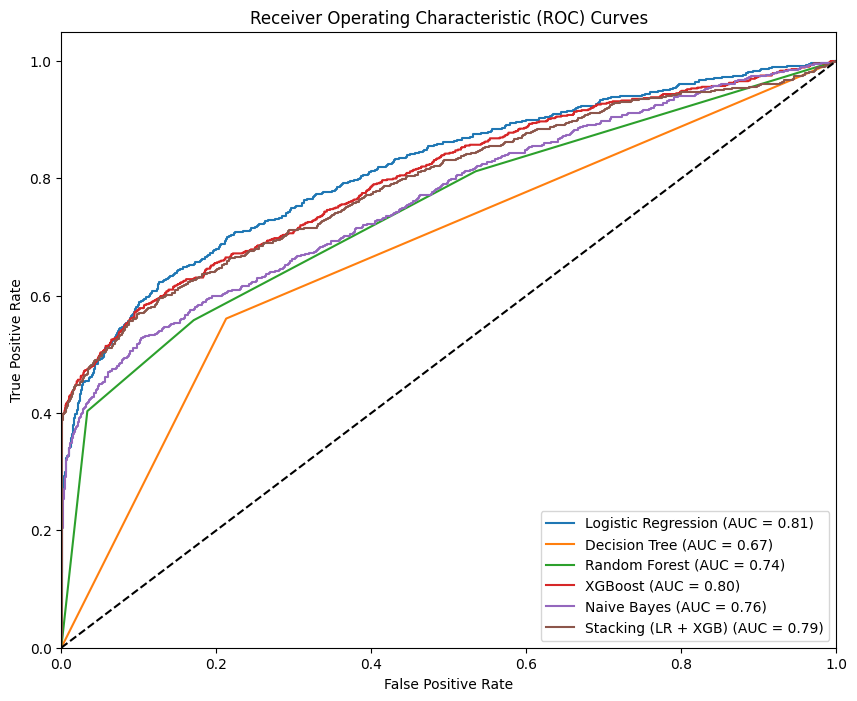

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()